### EJERCICIO 1

**Enunciado**: Lee un árbol filogenético en formato newick con N especies y
obtén información sobre sus nodos, ramas y clados. Por ejemplo, el número
de nodos, el número de terminales, el nombre de cada terminal, la longitud de
cada rama, el clado más común, etc.


Entre los requisitos, se destaca que el árbol tenga 10 clados.

> Nosotros lo cumplimos correctamente, ya que estamos tratando un árbol extaído de la rama Fungi.

# La rama **Fungi**

In [33]:
from IPython.display import Image, display

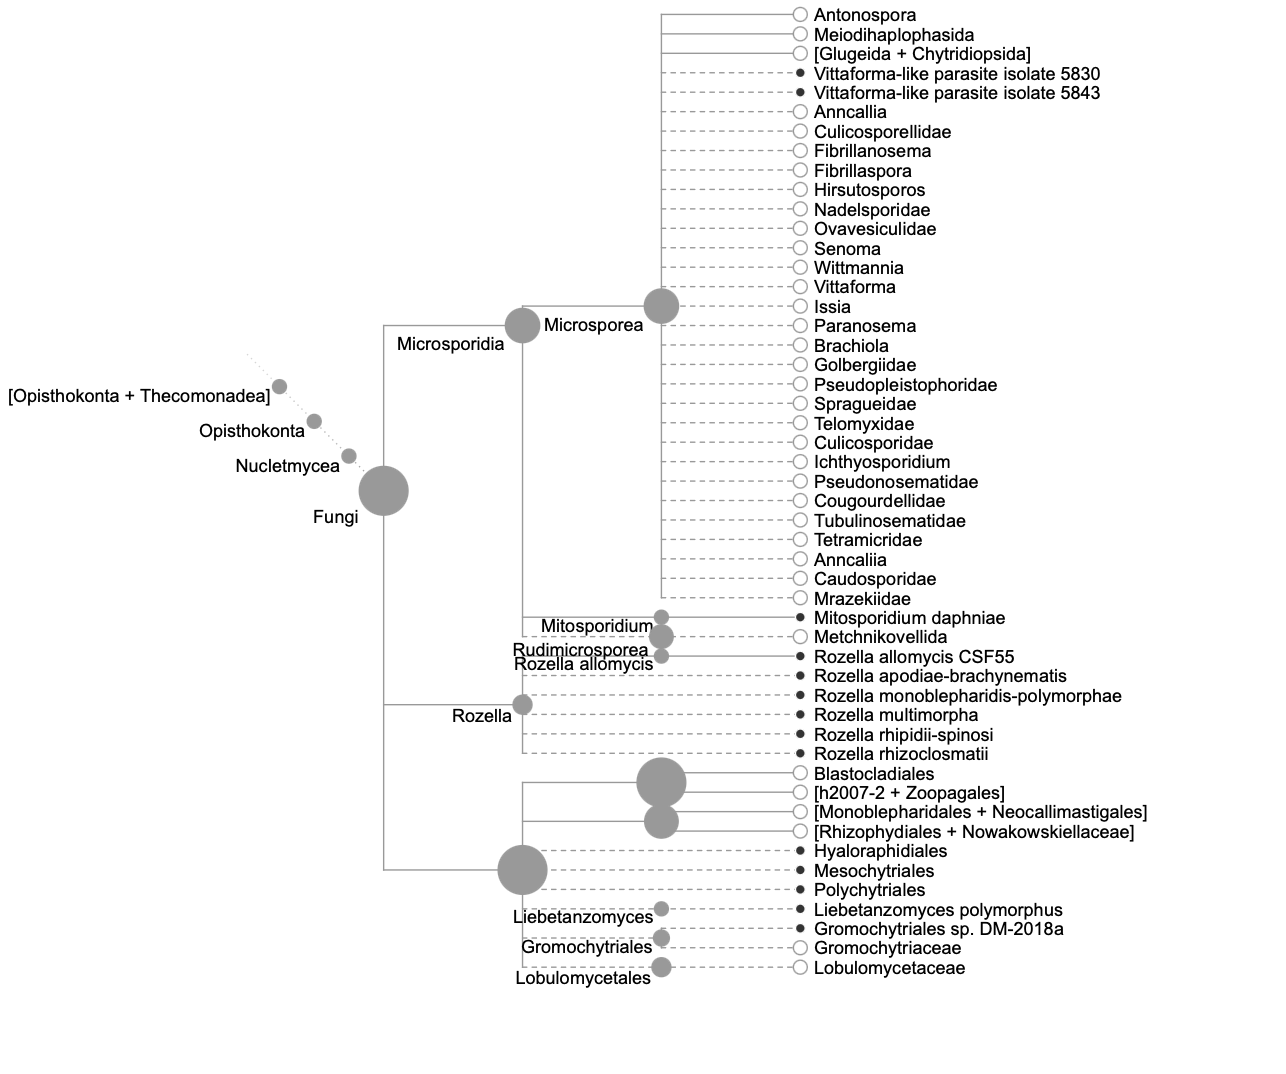

In [34]:
display(Image(filename="fungi.png"))

> El árbol lo hemos obtenido de la base de datos https://tree.opentreeoflife.org/opentree/argus/ottol@352914/Fungi. 

En concreto, debido a la extensión del árbol, nos centramos en:

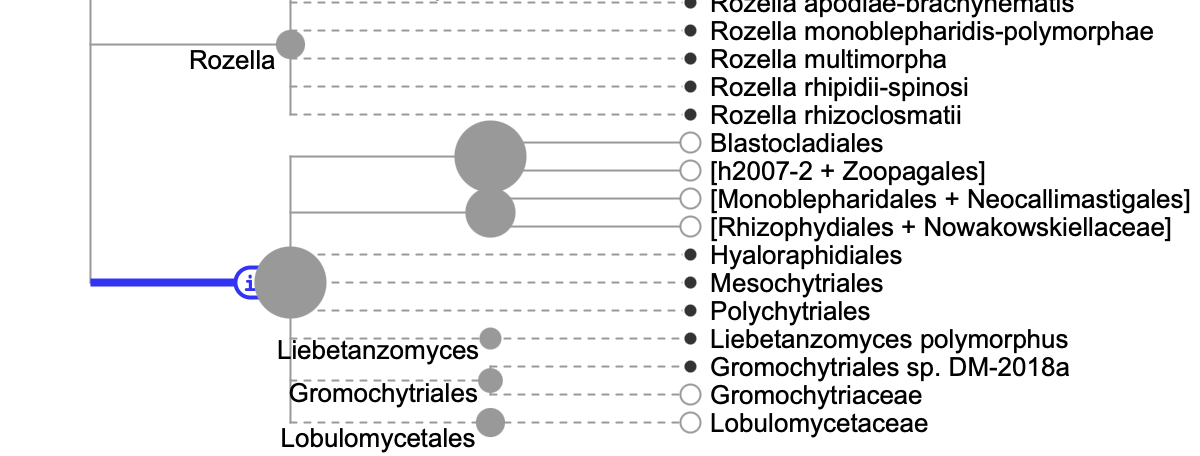

In [35]:
display(Image(filename="fungi_extracted.png"))

In [36]:
from Bio import Phylo

In [37]:
tree = Phylo.read("fungi.dnd", "newick")
print(tree)

Tree(rooted=False, weight=1.0)
    Clade(branch_length=0.0, name='Root')
        Clade(branch_length=0.4, name='Rozella_group')
            Clade(branch_length=0.3, name='Rozella_core')
                Clade(branch_length=0.2, name='Mitosporidium')
                Clade(branch_length=0.2, name='Rudimicrosporea')
                Clade(branch_length=0.2, name='Rozella_allomycis')
            Clade(branch_length=0.3, name='Rozella_extended')
                Clade(branch_length=0.2, name='Rozella_allomycis_CSF55')
                Clade(branch_length=0.2, name='Rozella_apodiae_brachynematis')
                Clade(branch_length=0.2, name='Rozella_monoblepharidis_polymorphae')
                Clade(branch_length=0.2, name='Rozella_multimorpha')
                Clade(branch_length=0.2, name='Rozella_rhipidii_spinosi')
                Clade(branch_length=0.2, name='Rozella_rhizoclosmatii')
                Clade(branch_length=0.2, name='Blastocladiales')
                Clade(branch_length=0.2,

In [38]:
Phylo.draw_ascii(tree)

                               ________ Mitosporidium
                              |
                  ____________|________ Rudimicrosporea
                 |            |
                 |            |________ Rozella_allomycis
                 |
                 |             ________ Rozella_allomycis_CSF55
                 |            |
                 |            |________ Rozella_apodiae_brachynematis
                 |            |
  _______________|            |________ Rozella_monoblepharidis_polymorphae
 |               |            |
 |               |            |________ Rozella_multimorpha
 |               |            |
 |               |            |________ Rozella_rhipidii_spinosi
 |               |            |
 |               |            |________ Rozella_rhizoclosmatii
 |               |            |
 |               |____________|________ Blastocladiales
 |                            |
 |                            |________ h2007_2_Zoopagales
 |          

### **INFORMACIÓN DEL ÁRBOL**

Número total de nodos (clados, internos + terminales)

In [39]:
all_clades = list(tree.find_clades())
num_nodos = len(all_clades)
print(f"Número total de nodos (clados): {num_nodos}")

Número total de nodos (clados): 31


Terminales (hojas / especies)

In [40]:
terminales = tree.get_terminals()
num_terminales = len(terminales)
print(f"Número de terminales (especies): {num_terminales}")

print("\nNombres de las terminales:")
for t in terminales:
    print(" -", t.name)

Número de terminales (especies): 23

Nombres de las terminales:
 - Mitosporidium
 - Rudimicrosporea
 - Rozella_allomycis
 - Rozella_allomycis_CSF55
 - Rozella_apodiae_brachynematis
 - Rozella_monoblepharidis_polymorphae
 - Rozella_multimorpha
 - Rozella_rhipidii_spinosi
 - Rozella_rhizoclosmatii
 - Blastocladiales
 - h2007_2_Zoopagales
 - Monoblepharidales_Neocallimastigales
 - Rhizophydiales_Nowakowskielaceae
 - Hyaloraphidiales
 - Mesochytriales
 - Polychytriales
 - Liebetanzomyces
 - Liebetanzomyces_polymorphus
 - Gromochytriales
 - Gromochytriales_sp_DM2018a
 - Gromochytriaceae
 - Lobulomycetales
 - Lobulomycetaceae


Longitud de cada rama

In [41]:
print("\nLongitud de las ramas (si el Newick incluye longitudes):")
for clade in all_clades:
    if clade.branch_length is not None:
        nombre = clade.name if clade.name is not None else "[nodo interno]"
        print(f" - Rama hacia {nombre}: {clade.branch_length}")


Longitud de las ramas (si el Newick incluye longitudes):
 - Rama hacia Root: 0.0
 - Rama hacia Rozella_group: 0.4
 - Rama hacia Rozella_core: 0.3
 - Rama hacia Mitosporidium: 0.2
 - Rama hacia Rudimicrosporea: 0.2
 - Rama hacia Rozella_allomycis: 0.2
 - Rama hacia Rozella_extended: 0.3
 - Rama hacia Rozella_allomycis_CSF55: 0.2
 - Rama hacia Rozella_apodiae_brachynematis: 0.2
 - Rama hacia Rozella_monoblepharidis_polymorphae: 0.2
 - Rama hacia Rozella_multimorpha: 0.2
 - Rama hacia Rozella_rhipidii_spinosi: 0.2
 - Rama hacia Rozella_rhizoclosmatii: 0.2
 - Rama hacia Blastocladiales: 0.2
 - Rama hacia h2007_2_Zoopagales: 0.2
 - Rama hacia Monoblepharidales_Neocallimastigales: 0.2
 - Rama hacia Rhizophydiales_Nowakowskielaceae: 0.2
 - Rama hacia Hyaloraphidiales: 0.2
 - Rama hacia Mesochytriales: 0.2
 - Rama hacia Polychytriales: 0.2
 - Rama hacia Basal_Rozella_lineages: 0.4
 - Rama hacia Lieb_group: 0.3
 - Rama hacia Liebetanzomyces: 0.2
 - Rama hacia Liebetanzomyces_polymorphus: 0.2
 

Clado más común

In [42]:
max_clade = None
max_size = 0

for clade in all_clades:
    hojas_clado = clade.get_terminals()
    size = len(hojas_clado)
    if size > max_size:
        max_size = size
        max_clade = clade

print("\nClado con mayor número de terminales:")
nombre_clado = max_clade.name if max_clade.name is not None else "[nodo interno sin nombre]"
print(f" - Nombre del clado: {nombre_clado}")
print(f" - Número de terminales en ese clado: {max_size}")
print(" - Especies en ese clado:")
for t in max_clade.get_terminals():
    print("   ·", t.name)


Clado con mayor número de terminales:
 - Nombre del clado: Root
 - Número de terminales en ese clado: 23
 - Especies en ese clado:
   · Mitosporidium
   · Rudimicrosporea
   · Rozella_allomycis
   · Rozella_allomycis_CSF55
   · Rozella_apodiae_brachynematis
   · Rozella_monoblepharidis_polymorphae
   · Rozella_multimorpha
   · Rozella_rhipidii_spinosi
   · Rozella_rhizoclosmatii
   · Blastocladiales
   · h2007_2_Zoopagales
   · Monoblepharidales_Neocallimastigales
   · Rhizophydiales_Nowakowskielaceae
   · Hyaloraphidiales
   · Mesochytriales
   · Polychytriales
   · Liebetanzomyces
   · Liebetanzomyces_polymorphus
   · Gromochytriales
   · Gromochytriales_sp_DM2018a
   · Gromochytriaceae
   · Lobulomycetales
   · Lobulomycetaceae


### EJERCICIO 2


**Enunciado**: Modifica el árbol filogenético previo cambiando el nombre, la
longitud o el color de algunos nodos o ramas. Por ejemplo, cambia el nombre
de las especies, la longitud de la rama que conecta alguna especie por 0.5 y el
color de la rama que conecta alguna otra especie por rojo.